<a href="https://colab.research.google.com/github/AniketMishra1099/Group1HackathonProject/blob/main/Group1_CreditCard_fraud-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

from collections import Counter

sns.set()
%matplotlib inline

In [102]:
# Define the path to the zip file in the sample_data folder
zip_file_path = '/content/sample_data/creditcard_data.zip'

# Define the extraction path
extract_to = '/content/sample_data/extracted'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Define the path to the CSV file inside the extracted folder
csv_file_path = os.path.join(extract_to, 'creditcard.csv')

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)


In [103]:
#Display the data head
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [104]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [105]:
#Time feature is not making sense as it contains second collapsed between each transaction. It seem not that much important

In [106]:
data=data.drop(['Time'],axis=1)

In [107]:
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [108]:
#It tells us the rows and columns that are there in dataset
data.shape

(284807, 30)

In [109]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [111]:
# Let's check the data present in class section
len(data[data['Class'] == 1])

492

In [112]:
len(data[data['Class'] == 0])

284315

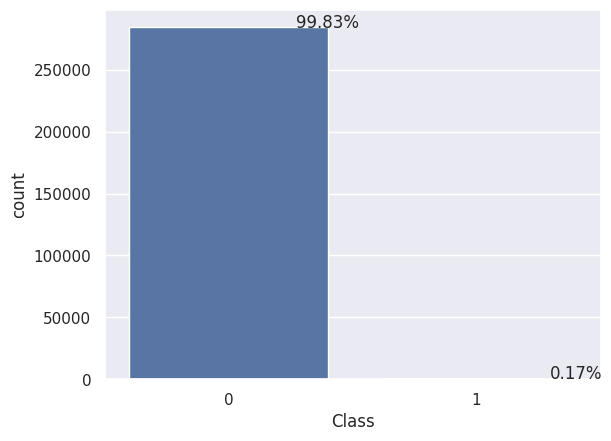

In [113]:
ax = sns.countplot(x='Class',data=data)
total = float(len(data))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

**Here we can clearly see the proprtion of 18.58% is a fraud data and 81.42% is Non Fradulent data.**

In [114]:
#Here we will be finding out the correlation and Important features
data.corr()['Class'].sort_values()

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


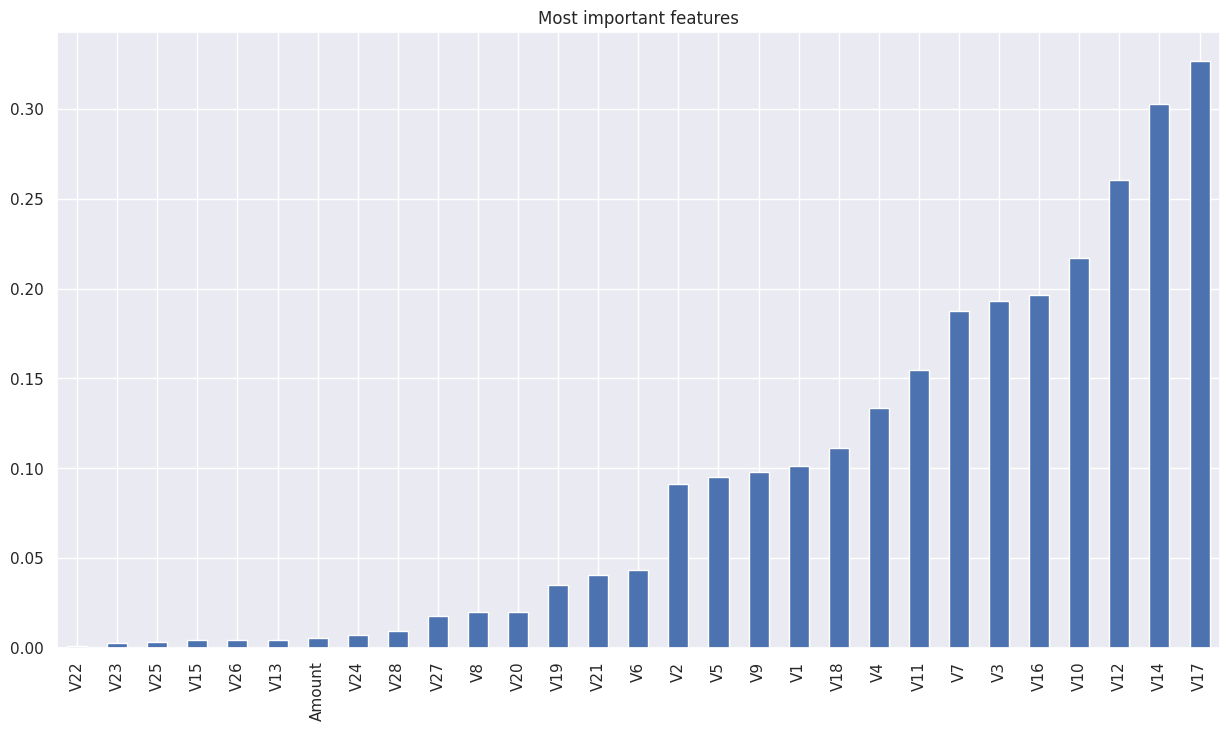

In [115]:
#Plotting the correlation to understand the correlation in a better way
plt.figure(figsize=(15,8))
d = data.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [116]:
# Let's peak all features with correlation 0.15 and more

c = data.corr()['Class'][:-1].abs() > 0.15

print (c)

V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


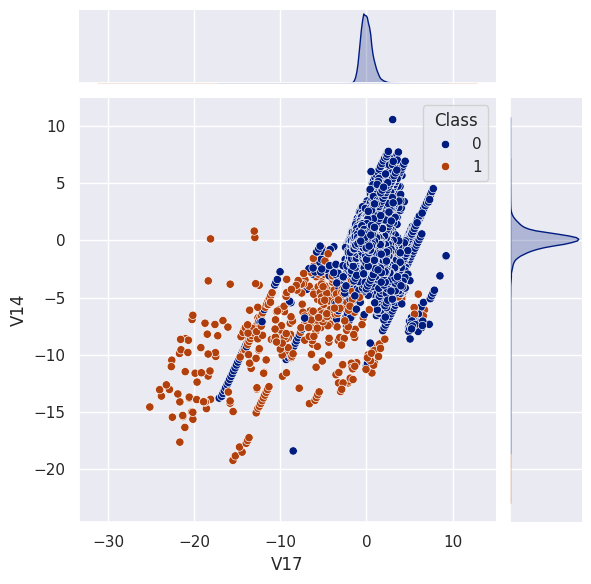

In [117]:
sns.jointplot(x='V17', y='V14',hue='Class', data=data, palette = 'dark')

In [69]:
# Now we have to  do the feature engineering
#Now we are doing outlier detection
#Let's check the distribution of the features with 0,13 and higher and correlation


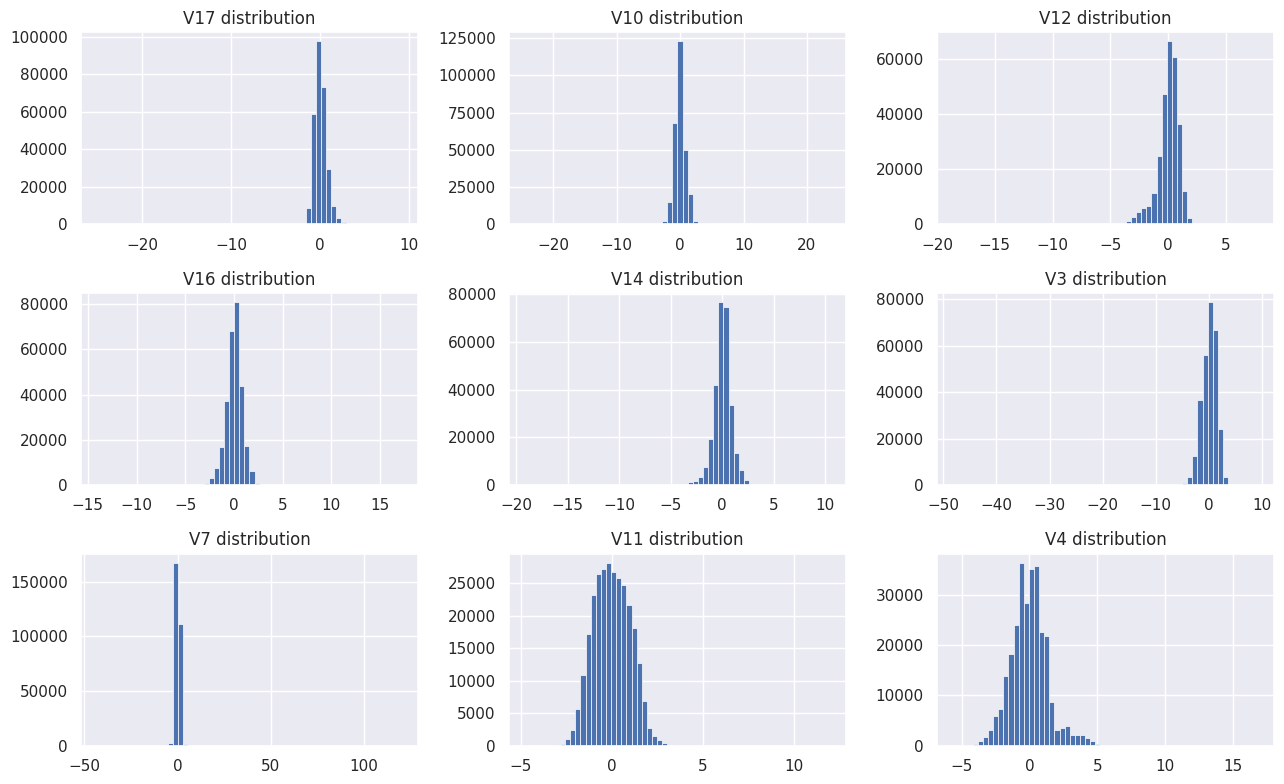

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(data['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(data['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(data['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(data['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(data['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(data['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(data['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(data['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(data['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [72]:
#A lot of outliers we can see so now we can use a method to remove the outlier


**Identifying Outliers:**

For each column, calculate Q1 (25th percentile) and Q3 (75th percentile)

Compute the IQR as IQR = Q3 - Q1.

Determine the lower and upper bounds as lower_bound = Q1 - 1.5 * IQR and upper_bound = Q3 + 1.5 * IQR.

Filter the DataFrame to keep only the data points within these bounds.

**Re-plotting Histograms:**

Remove outliers from the dataset using the remove_outliers function.
Re-plot the cleaned data to visualize the distributions without outliers.

In [119]:
def detect_outliers(data,n,features):
    """
    Takes a dataframe data of features and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []

    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index

        # appending the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detecting outliers
Outliers_IQR = detect_outliers(data,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

# dropping outliers
data_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [120]:
len(Outliers_IQR)

47116

In [121]:
data_out

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237686,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
237687,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
237688,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
237689,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


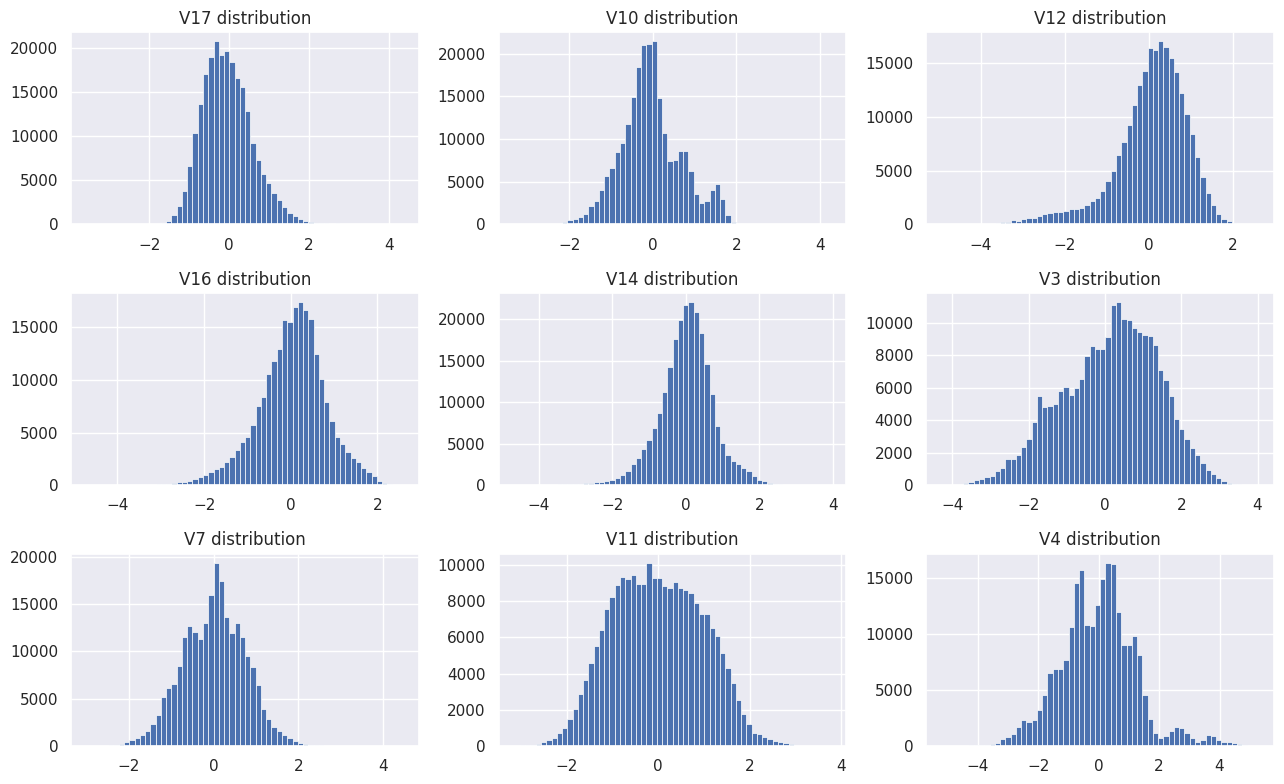

In [122]:
# Checking distributions of most important features after dropping outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,8))

axes[0,0].hist(data_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution")

axes[0,1].hist(data_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution")

axes[0,2].hist(data_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution")

axes[1,0].hist(data_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution")

axes[1,1].hist(data_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution")

axes[1,2].hist(data_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution")

axes[2,0].hist(data_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution")

axes[2,1].hist(data_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution")

axes[2,2].hist(data_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution")

plt.tight_layout()
plt.show()

In [123]:
print ('The amount of frauds in data before dropping outliers: ', len(data[data['Class'] == 1]))

The amount of frauds in data before dropping outliers:  492


In [124]:
print ('The amount of frauds in data after dropping outliers: ', len(data_out[data_out['Class'] == 1]))

The amount of frauds in data after dropping outliers:  43


In [125]:
#It looks like outliers are very similar to fraud values and we dropped most of them!

#Let's create a new df with dropped outliers only.

Outliers_newData = data.loc[data.index[Outliers_IQR]]

len(Outliers_newData)

47116

In [127]:
Outliers_newData

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275573,-2.796570,-1.602426,0.553124,-0.972816,-0.090899,0.423694,0.037604,0.500683,-1.163213,-0.218494,...,-0.766574,-1.794549,-0.536869,0.233628,0.208626,-0.435249,0.509353,-0.512349,283.20,0
277296,-0.514141,0.949264,-1.164256,-0.687624,0.784550,1.162172,1.753924,-0.052698,0.015033,-0.785415,...,-0.209018,-0.107877,0.148562,-0.421933,-0.589293,0.238553,-0.676694,-0.584556,195.40,0
277581,-0.112954,0.944074,-2.352370,0.944593,0.767084,-0.491613,1.898752,0.062521,-1.224329,0.218670,...,0.714246,1.895837,0.441559,0.729273,-1.048663,-0.415093,0.407531,0.354169,197.72,0
280989,-0.303032,0.515443,-2.395964,-0.052680,0.454179,-1.607054,2.039611,-0.188682,-0.446324,-0.439347,...,0.671690,1.721186,0.444797,-0.004811,-1.012256,-0.141775,0.369032,0.314705,214.20,0


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout

# Assuming 'Outliers_newData' is your DataFrame after removing outliers
X = Outliers_newData.drop('Class', axis=1).values
y = Outliers_newData['Class'].values

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Models
nnmodel = keras.Sequential([
    Dense(1, activation=tf.nn.sigmoid)
])

nnmodel2 = keras.Sequential([
    Dense(10, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(1, activation=tf.nn.sigmoid)
])

nnmodel.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
nnmodel2.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

# Other Machine Learning Models
models = {
    'naive_bayes': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svc': SVC(),
    'linear_svc': LinearSVC(),
    'decision_tree': DecisionTreeClassifier(),
    'decision_tree100': DecisionTreeClassifier(max_depth=100),
    'decision_tree200': DecisionTreeClassifier(max_depth=200),
    'decision_tree300': DecisionTreeClassifier(max_depth=300),
    'random_forest': RandomForestClassifier(),
    'random_forest200': RandomForestClassifier(n_estimators=200),
    'random_forest400': RandomForestClassifier(n_estimators=400),
    'random_forest500': RandomForestClassifier(n_estimators=500),
    'logistic_regression': LogisticRegression(),
    'neural_network_linear': nnmodel,
    'neural_network_nonlinear': nnmodel2
}

# Measure the performance of models -> accuracy
max_accuracy = 0
best_model_name = None
best_model = None
log_model = None

for model_name, model in models.items():
    if model_name == 'logistic_regression':
        log_model = model
    if model_name in ['neural_network_linear', 'neural_network_nonlinear']:
        history = model.fit(X_train, y_train, epochs=100, verbose=0)
        p = model.predict(X_test)
        encoder = lambda val: 1 if val > 0.5 else 0
        p = [encoder(val) for val in p]
    else:
        model.fit(X_train, y_train)
        p = model.predict(X_test)

    accuracy = accuracy_score(y_test, p)
    print(f"{model_name} accuracy: {accuracy}")
    print('****')

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_model_name = model_name
        best_model = model

print(f"Best model: {best_model_name} with accuracy: {max_accuracy}")

naive_bayes accuracy: 0.9793700653705748
****
knn accuracy: 0.9979624755921556
****
svc accuracy: 0.9966890228372527
****
linear_svc accuracy: 0.994821292130062
****
decision_tree accuracy: 0.9969437133882333
****
decision_tree100 accuracy: 0.9970286102385602
****
decision_tree200 accuracy: 0.9966041259869259
****
decision_tree300 accuracy: 0.9969437133882333
****
random_forest accuracy: 0.9983869598437898
****
random_forest200 accuracy: 0.9985567535444435
****
random_forest400 accuracy: 0.9984718566941166
****
random_forest500 accuracy: 0.9984718566941166
****
logistic_regression accuracy: 0.9947363952797351
****
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
neural_network_linear accuracy: 0.994821292130062
****
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
neural_network_nonlinear accuracy: 0.9979624755921556
****
Best model: random_forest200 with accuracy: 0.9985567535444435


In [129]:
log_model.intercept_

array([1.20642113])

In [132]:
log_model.coef_

array([[ 2.07311884,  1.54578204, -0.64346802,  5.31823796,  0.92609031,
        -0.60834666, -0.43598638, -0.17767009, -2.24087016, -2.69263195,
         5.19030725, -4.77475713, -2.09217621, -7.70346758, -0.21211575,
        -2.12076414, -2.30055703, -0.70214655,  0.5519862 ,  0.70837538,
         1.24320798,  0.38905906,  0.52971526, -0.50101526,  0.29478754,
         0.84489808,  0.31158058,  0.45748636, -0.47604007]])